In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyabf

In [3]:
df = pd.read_pickle('E://bacteria_data/dataframes/full_df3.pkl')
df = df[(df.pore=='pet2363')|(df.pore=='pet2250')]

In [9]:
table = df.groupby(['pore','particle','date','run']).agg({'di_i':['mean','std'],'di_i2':['mean','std'],
                                                          'dt':['mean','std'],'dt2':['mean','std']})

In [10]:
table.to_csv('E:/bacteria_data/summary/calc1.csv')

In [5]:
df[(df.pore=='pet2250')&(df.date=='2-25-22')&(df.particle=='control')].di_i2

3234    0.000023
3235   -0.000009
3236   -0.000007
3237    0.000012
3238   -0.000055
          ...   
3651   -0.000049
3652    0.000084
3653   -0.000052
3654   -0.000010
3655   -0.000012
Name: di_i2, Length: 422, dtype: float64

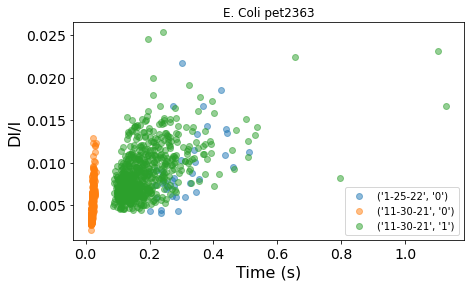

In [33]:
tdf = df[(df.pore=='pet2363')&(df.particle=='ecoli')]
fig, ax = plt.subplots(figsize=(7,4))
for key, grp in tdf.groupby(['date','run']):
    ax.scatter(grp['dt'], grp['di_i'], label=key,alpha=0.5)

ax.legend()
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('Time (s)',size = 16)
ax.set_ylabel('DI/I',size = 16)
plt.title('E. Coli pet2363')
plt.savefig('E://bacteria_data//plots//scatter//pet2363_ecoli.png',dpi=300)
plt.show()

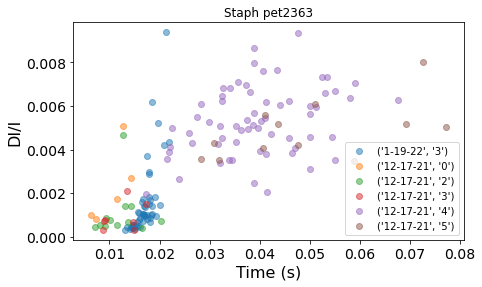

In [34]:
tdf = df[(df.pore=='pet2363')&(df.particle=='staph')]
fig, ax = plt.subplots(figsize=(7,4))
for key, grp in tdf.groupby(['date','run']):
    ax.scatter(grp['dt'], grp['di_i'], label=key,alpha=0.5)

ax.legend()
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('Time (s)',size = 16)
ax.set_ylabel('DI/I',size = 16)
plt.title('Staph pet2363')
plt.savefig('E://bacteria_data//plots//scatter//pet2363_staph.png',dpi=300)
plt.show()

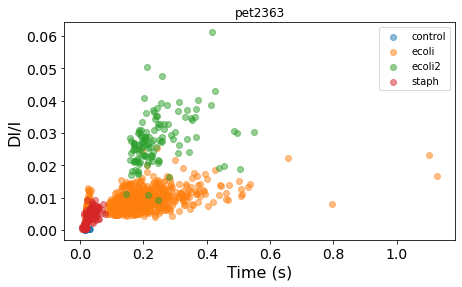

In [35]:
tdf = df[(df.pore=='pet2363')]
fig, ax = plt.subplots(figsize=(7,4))
for key, grp in tdf.groupby(['particle']):
    ax.scatter(grp['dt'], grp['di_i'], label=key,alpha=0.5)

ax.legend()
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('Time (s)',size = 16)
ax.set_ylabel('DI/I',size = 16)
plt.title('pet2363')
plt.savefig('E://bacteria_data//plots//scatter//pet2363_full.png',dpi=300)
plt.show()

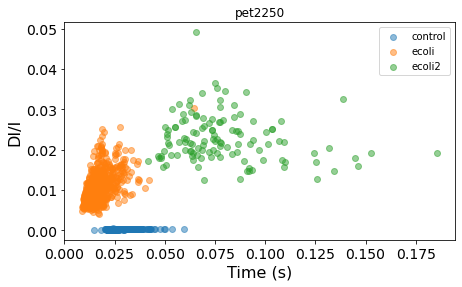

In [37]:
tdf = df[(df.pore=='pet2250')]
fig, ax = plt.subplots(figsize=(7,4))
for key, grp in tdf.groupby(['particle']):
    ax.scatter(grp['dt'], grp['di_i'], label=key,alpha=0.5)

ax.legend()
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xlabel('Time (s)',size = 16)
ax.set_ylabel('DI/I',size = 16)
plt.title('pet2250')
plt.savefig('E://bacteria_data//plots//scatter//pet2250_full.png',dpi=300)
plt.show()

In [21]:
temp_df = df[df.pore=='pet2250']
part = df.particle.unique()
temp_df[temp_df.particle=='ecoli'].di_i.mean()

0.010145070085060005

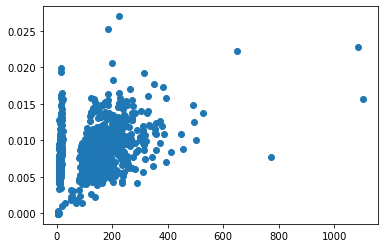

In [11]:
temp_df = df[(df.pore=='pet2363')&(df.particle=='ecoli')]

plt.scatter(temp_df.dt2*1000,temp_df.di_i2)

In [6]:
temp_df = df[(df.run=='0')&(df.particle=='ecoli')]

In [74]:
for i in range(len(temp_df)):
    

    event = temp_df.iloc[i]

    b_std = np.std(np.concatenate([event.i[10:20],event.i[-21:-10]]))
    det = event.baseline-5*b_std
    
    start,end = find_start(event.i,det)
    
    plt.plot(event.t,event.i)
    plt.scatter(event.t[10:20],event.i[10:20])
    plt.scatter(event.t[-21:-10],event.i[-21:-10])
    plt.hlines(det,event.t[0],event.t[-1],color='red')
    plt.plot(event.t[start:end],event.i[start:end],color = 'green')

    plt.savefig('E://bacteria_data//pores//pet2363//ecoli//11-30-21//0//event_plots_thresh//'+str(i))
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [69]:
event = temp_df.iloc[0]

b_std = np.std(np.concatenate([event.i[10:20],event.i[-21:-10]]))
det = event.baseline-6*b_std
    
start,end = find_start(event.i,det)

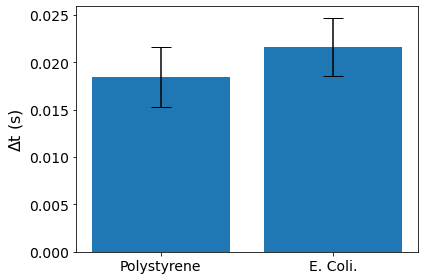

In [27]:
temp_df = df[df.particle=='control']
poly_mean = temp_df.dt.mean()
poly_std = temp_df.dt.std()

temp_df = df[(df.run=='0')&(df.particle=='ecoli')]
ecoli_mean = temp_df.dt.mean()
ecoli_std = temp_df.dt.std()

x = np.arange(2)

plt.bar(x,[poly_mean,ecoli_mean],yerr=[poly_std,ecoli_std],capsize=10)

plt.xticks(x,('Polystyrene','E. Coli.'),size=14)
plt.tick_params(axis='both', which='major', labelsize=14)

plt.ylabel('$\Delta$t (s)',size=16)

#plt.title('Pore Radius = 2.36 $\mu m$')
plt.tight_layout()
plt.savefig('D://bacteria_data/plots/bar/dt/bar_2363_dt_ecoli.png',dpi=300)

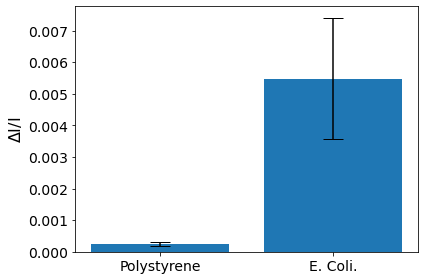

In [180]:
temp_df = df[df.particle=='control']
poly_mean = temp_df.di_i.mean()
poly_std = temp_df.di_i.std()

temp_df = df[(df.run=='0')&(df.particle=='ecoli')]
ecoli_mean = temp_df.di_i.mean()
ecoli_std = temp_df.di_i.std()

x = np.arange(2)

plt.bar(x,[poly_mean,ecoli_mean],yerr=[poly_std,ecoli_std],capsize=10)

plt.xticks(x,('Polystyrene','E. Coli.'),size=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.ylabel('$\Delta$I/I',size=16)

plt.title('Pore Radius = 2.36 $\mu m$')
plt.tight_layout()

plt.savefig('D://bacteria_data/plots/bar/bar_2363_di_ecoli.png',dpi=300)